# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of Ridge and Lasso regression!

## Objectives

In this lab you will: 

- Use Lasso and Ridge regression with scikit-learn 
- Compare and contrast Lasso, Ridge and non-regularized regression 

## Housing Prices Data

Let's look at yet another house pricing dataset: 

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing_Prices/train.csv')

Look at `.info()` of the data: 

In [45]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- First, split the data into `X` (predictor) and `y` (target) variables 
- Split the data into 75-25 training-test sets. Set the `random_state` to 10 
- Remove all columns of `object` type from `X_train` and `X_test` and assign them to `X_train_cont` and `X_test_cont`, respectively 

In [46]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [47]:
# Create X and y
y = df['SalePrice']
X = df.drop(columns=['SalePrice'], axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=22)

# Remove "object"-type features from X
cont_features = [col for col in X.columns if X[col].dtype in [np.float64, np.int64]]

# Remove "object"-type features from X_train and X_test
X_train_cont = X_train.loc[:,cont_features]
X_test_cont = X_test.loc[:,cont_features]

## Let's use this data to build a first naive linear regression model

- Fill the missing values in data using median of the columns (use [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)) 
- Fit a linear regression model to this data 
- Compute the R-squared and the MSE for both the training and test sets 


In [48]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Impute missing values with median using SimpleImputer
impute = SimpleImputer(strategy='median')
X_train_imputed = impute.fit_transform(X_train_cont)
X_test_imputed = impute.transform(X_test_cont)

# Fit the model and print R2 and MSE for training and test sets
linreg = LinearRegression()
linreg.fit(X_train_imputed, y_train)

# Print R2 and MSE for training and test sets
print('Training r^2:', linreg.score(X_train_imputed, y_train))
print('Test r^2:', linreg.score(X_test_imputed, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train_imputed)))
print('Test MSE:', mean_squared_error(y_test, linreg.predict(X_test_imputed)))

Training r^2: 0.8025192127123502
Test r^2: 0.8332358140362535
Training MSE: 1211656890.909874
Test MSE: 1135124796.7988367


## Normalize your data

- Normalize your data using a `StandardScalar`  
- Fit a linear regression model to this data 
- Compute the R-squared and the MSE for both the training and test sets 


In [49]:
from sklearn.preprocessing import StandardScaler

# Scale the train and test data
ss = StandardScaler()
X_train_imputed_scaled = ss.fit_transform(X_train_imputed)
X_test_imputed_scaled = ss.transform(X_test_imputed)

# Fit the model
linreg_norm = LinearRegression()
linreg_norm.fit(X_train_imputed_scaled, y_train)


# Print R2 and MSE for training and test sets
print('Training r^2 Scaled:', linreg_norm.score(X_train_imputed_scaled, y_train))
print('Test r^2 Sclaed:', linreg_norm.score(X_test_imputed_scaled, y_test))
print('Training MSE Scaled:', mean_squared_error(y_train, linreg_norm.predict(X_train_imputed_scaled)))
print('Test MSE Scaled:', mean_squared_error(y_test, linreg_norm.predict(X_test_imputed_scaled)))


Training r^2 Scaled: 0.8025330594197979
Test r^2 Sclaed: 0.8332831321334606
Training MSE Scaled: 1211571933.4883146
Test MSE Scaled: 1134802713.5819478


## Include categorical variables

The above models didn't include categorical variables so far, let's include them! 


- Include all columns of `object` type from `X_train` and `X_test` and assign them to `X_train_cat` and `X_test_cat`, respectively 
- Fill missing values in all these columns with the string `'missing'` 

In [53]:
# Create X_cat which contains only the categorical variables
features_cat = [col for col in X.columns if X[col].dtype in [np.object]]
X_train_cat = X_train.loc[:, features_cat]
X_test_cat = X_test.loc[:, features_cat]

# Fill missing values with the string 'missing'
X_train_cat.fillna(value='missing', inplace=True)
X_test_cat.fillna(value='missing', inplace=True)

In [30]:
# # Create X_cat which contains only the categorical variables
# features_cat = [col for col in X.columns if X[col].dtype in [np.object]]
# X_train_cat = X_train.loc[:, features_cat]
# X_test_cat = X_test.loc[:, features_cat]

# # Fill missing values with the string 'missing'
# X_train_cat.fillna(value="missing", inplace=True)
# X_test_cat.fillna(value="missing", inplace=True)


- One-hot encode all these categorical columns using `OneHotEncoder` 
- Transform the training and test DataFrames (`X_train_cat`) and (`X_test_cat`) 
- Run the given code to convert these transformed features into DataFrames 

In [22]:
print(np.shape(X_train_cat))

(1095, 43)


In [23]:
type(X_train_cat)

pandas.core.frame.DataFrame

In [36]:
X_train_cat.reset_index()

,index,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,571,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,missing,missing,missing,WD,Abnorml
1,1356,RL,Pave,missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,Attchd,RFn,TA,TA,Y,missing,GdWo,missing,WD,Normal
2,198,RM,Pave,missing,Reg,Lvl,AllPub,Corner,Gtl,OldTown,...,missing,missing,missing,missing,Y,missing,MnPrv,missing,WD,Abnorml
3,230,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
4,986,RM,Pave,missing,Reg,Lvl,AllPub,Corner,Gtl,OldTown,...,Attchd,Unf,Fa,TA,Y,missing,missing,missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,356,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
1091,960,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,...,missing,missing,missing,missing,Y,missing,missing,missing,WD,Normal
1092,812,C (all),Grvl,missing,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,...,Basment,Unf,TA,TA,N,missing,missing,Shed,WD,Alloca
1093,132,RL,Pave,missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,Detchd,Unf,TA,TA,Y,missing,missing,missing,WD,Normal


In [70]:
# import pandas as pd
# X_test_cat.loc['Metal']

KeyError: 'Metal'

In [71]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncode categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform training and test sets
X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

# Convert these columns into a DataFrame 
columns = ohe.get_feature_names(input_features=X_train_cat.columns)
cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)

In [72]:
# from sklearn.preprocessing import OneHotEncoder

# # OneHotEncode categorical variables
# ohe = OneHotEncoder(##### this is what was different)

# # Transform training and test sets
# X_train_ohe = ohe.fit_transform(X_train_cat)
# X_test_ohe = ohe.transform(X_test_cat)

# # Convert these columns into a DataFrame
# columns = ohe.get_feature_names(input_features=X_train_cat.columns)
# cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
# cat_test_df = pd.DataFrame(X_test_ohe, columns=columns)

- Combine `X_train_imputed_scaled` and `cat_train_df` into a single DataFrame  
- Similarly, combine `X_test_imputed_scaled` and `cat_test_df` into a single DataFrame 

In [73]:
# Your code here
X_train_all = pd.concat([pd.DataFrame(X_train_imputed_scaled), cat_train_df], axis=1)
X_test_all = pd.concat([pd.DataFrame(X_test_imputed_scaled), cat_test_df], axis=1)

Now build a linear regression model using all the features (`X_train_all`). Also, print the R-squared and the MSE for both the training and test sets. 

In [77]:
linreg_all = LinearRegression()
linreg_all.fit(X_train_all, y_train)

print('Training r^2:', linreg_all.score(X_train_all, y_train))
print('Test r^2:', linreg_all.score(X_test_all, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg_all.predict(X_train_all)))
print('Test MSE:', mean_squared_error(y_test, linreg_all.predict(X_test_all)))

Training r^2: 0.9231809925987229
Test r^2: -6.404322779485125e+21
Training MSE: 471328279.3178082
Test MSE: 4.359272676974901e+31


In [79]:
# Your code here
linreg_all = LinearRegression()
linreg_all.fit(X_train_all, y_train)

print(f'R^2:', (linreg_all.score(X_train_all, y_train)))
print(f'MSE:', (mean_squared_error(y_train, linreg_all.predict(X_train_all))))


R^2: 0.9231809925987229
MSE: 471328279.3178082


Notice the severe overfitting above; our training R-squared is very high, but the test R-squared is negative! Similarly, the scale of the test MSE is orders of magnitude higher than that of the training MSE.

## Ridge and Lasso regression

Use all the data (normalized features and dummy categorical variables, `X_train_all`) to build two models - one each for Lasso and Ridge regression. Each time, look at R-squared and MSE. 

## Lasso

#### With default parameter (alpha = 1)

In [89]:
# Your code here

from sklearn.linear_model import Lasso, Ridge, LinearRegression

lasso = Lasso(alpha=1)
lasso.fit(X_train_all, y_train)

print(f'Training R^2:', lasso.score(X_train_all, y_train))
print(f'Training MSE Lasso alpha 1:', mean_squared_error(y_train, lasso.predict(X_train_all)))
print(f'Testing R^2:', lasso.score(X_test_all, y_test))
print(f'Testing MSE Lasso alpha 1:', mean_squared_error(y_test, lasso.predict(X_test_all)))

Training R^2: 0.9462907001349429
Training MSE Lasso alpha 1: 329537086.52502936
Testing R^2: 0.8171005029171295
Testing MSE Lasso alpha 1: 1244954084.4815245


#### With a higher regularization parameter (alpha = 10)

In [90]:
# Your code here
from sklearn.linear_model import Lasso, Ridge, LinearRegression

lasso = Lasso(alpha=10)
lasso.fit(X_train_all, y_train)

print(f'Training R^2:', lasso.score(X_train_all, y_train))
print(f'Training MSE Lasso alpha 10:', mean_squared_error(y_train, lasso.predict(X_train_all)))
print(f'Testing R^2:', lasso.score(X_test_all, y_test))
print(f'Testing MSE Lasso alpha 10:', mean_squared_error(y_test, lasso.predict(X_test_all)))

Training R^2: 0.9448947184077532
Training MSE Lasso alpha 10: 338102227.9879806
Testing R^2: 0.8279560267382309
Testing MSE Lasso alpha 10: 1171063073.648711


## Ridge

#### With default parameter (alpha = 1)

In [91]:
# Your code here
ridge = Ridge(alpha=1)
ridge.fit(X_train_all, y_train)

print(f'Training R^2:', ridge.score(X_train_all, y_train))
print(f'Training MSE Ridge alpha 1:', mean_squared_error(y_train, ridge.predict(X_train_all)))
print(f'Testing R^2:', ridge.score(X_test_all, y_test))
print(f'Testing MSE Ridge alpha 1:', mean_squared_error(y_test, ridge.predict(X_test_all)))

Training R^2: 0.9272002702491937
Training MSE Ridge alpha 1: 446667726.1138178
Testing R^2: 0.8722571909886878
Testing MSE Ridge alpha 1: 869515413.5373003


#### With default parameter (alpha = 10)

In [92]:
# Your code here
# Your code here
ridge = Ridge(alpha=10)
ridge.fit(X_train_all, y_train)

print(f'Training R^2:', ridge.score(X_train_all, y_train))
print(f'Training MSE Ridge alpha 10:', mean_squared_error(y_train, ridge.predict(X_train_all)))
print(f'Testing R^2:', ridge.score(X_test_all, y_test))
print(f'Testing MSE Ridge alpha 10:', mean_squared_error(y_test, ridge.predict(X_test_all)))

Training R^2: 0.8979200679292753
Training MSE Ridge alpha 10: 626318412.1144156
Testing R^2: 0.884899813576607
Testing MSE Ridge alpha 10: 783460039.5181103


## Compare the metrics    

Write your conclusions here: 
_________________________________

r^2 Training: values are smaller on ridge, and smallest when alpha increases
    * Training Lasso alpha 1 R^2: 0.9462907001349429
    * Training Lasso alpha 10 R^2: 0.9448947184077532
    * Training Ridge alpha 1 R^2: 0.9272002702491937
    *  **Training Ridge alpha 10 R^2: 0.8979200679292753**
    
    
MSE training: values are smaller on lasso, ans smallest when alpha increases
    * Training MSE Lasso alpha 1: 329537086.52502936
    *  **Training MSE Lasso alpha 10: 338102227.9879806**
    * Training MSE Ridge alpha 1: 446667726.1138178
    * Training MSE Ridge alpha 10: 626318412.1144156
    
r^2 Testing: values are smaller on lasso, and smallest when alpha decreases
    *  **Testing Lasso alpha 1 R^2: 0.8171005029171295**
    * Testing Lasso alpha 10  R^2: 0.8279560267382309
    * Testing Ridge alpha 1 R^2: 0.8722571909886878
    * Testing Ridge alpha 10 R^2: 0.884899813576607
    
MSE Testing: values are smllest on Ridge, and when alpha increases
    * Testing MSE Lasso alpha 1: 1244954084.4815245
    * Testing MSE Lasso alpha 10: 1171063073.648711
    * Testing MSE Ridge alpha 1: 869515413.5373003
    *  **Testing MSE Ridge alpha 10: 783460039.5181103**

## Compare number of parameter estimates that are (very close to) 0 for Ridge and Lasso

Use 10**(-10) as an estimate that is very close to 0. 

In [93]:
# Number of Ridge params almost zero
print(sum(abs(ridge.coef_) < 10**(-10)))

0


In [95]:
# Number of Lasso params almost zero
print(sum(abs(lasso.coef_) < 10**(-10)))

65


In [96]:
print(len(lasso.coef_))
print(sum(abs(lasso.coef_) < 10**(-10))/ len(lasso.coef_))

297
0.21885521885521886


Lasso was very effective to essentially perform variable selection and remove about 25% of the variables from your model!

## Put it all together

To bring all of our work together lets take a moment to put all of our preprocessing steps for categorical and continuous variables into one function. This function should take in our features as a dataframe `X` and target as a Series `y` and return a training and test DataFrames with all of our preprocessed features along with training and test targets. 

In [97]:
def preprocess(X, y):
    '''Takes in features and target and implements all preprocessing steps for categorical and continuous features returning 
    train and test DataFrames with targets'''
    
    # Train-test split (75-25), set seed to 10
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=10)
    
    # Remove "object"-type features and SalesPrice from X
    cont_features = [col for col in X.columns if X[col].dtype in [np.float64, np.int64]]
    X_train_cont = X_train.loc[:,cont_features]
    X_test_cont = X_test.loc[:,cont_features]
    

    # Impute missing values with median using SimpleImputer
    from sklearn.metrics import mean_squared_error, mean_squared_log_error
    from sklearn.linear_model import LinearRegression
    from sklearn.impute import SimpleImputer

    # Impute missing values with median using SimpleImputer
    impute = SimpleImputer(strategy='median')
    X_train_imputed = impute.fit_transform(X_train_cont)
    X_test_imputed = impute.transform(X_test_cont)

    # Scale the train and test data
    ss = StandardScaler()
    X_train_imputed_scaled = ss.fit_transform(X_train_imputed)
    X_test_imputed_scaled = ss.fit(X_test_imputed)

    # Create X_cat which contains only the categorical variables
    features_cat = [col for col in X.columns if X[col].dtype in [np.object]]
    X_train_cat = X_train.loc[:, features_cat]
    X_test_cat = X_test.loc[:, features_cat]


    # Fill nans with a value indicating that that it is missing
    X_train_cat.fillna(value="missing", inplace=True)
    X_test_cat.fillna(value="missing", inplace=True)

    # OneHotEncode Categorical variables
    from sklearn.preprocessing import OneHotEncoder

    # OneHotEncode categorical variables
    ohe = OneHotEncoder(handle_unknown='ignore')

    # Transform training and test sets
    X_train_ohe = ohe.fit_transform(X_train_cat)
    X_test_ohe = ohe.transform(X_test_cat)

    # Combine categorical and continuous features into the final dataframe
    columns = ohe.get_feature_names(input_features=X_train_cat.columns)
    cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
    cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)
    
    return X_train_all, X_test_all, y_train, y_test

### Graph the training and test error to find optimal alpha values

Earlier we tested two values of alpha to see how it effected our MSE and the value of our coefficients. We could continue to guess values of alpha for our Ridge or Lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would do this:  

In [105]:
X_train_all, X_test_all, y_train, y_test = preprocess(X, y)

train_mse = []
test_mse = []
alphas = []

for alpha in np.linspace(0, 200, num=75):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_all, y_train)
    
    train_preds = lasso.predict(X_train_all)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_all)
    test_mse.append(mean_squared_error(y_test, test_preds))
    
    alphas.append(alpha)

In [106]:
alphasdf = pd.DataFrame(alphas)

In [107]:
alphasdf

,0
0,0.000000
1,2.702703
2,5.405405
3,8.108108
4,10.810811
...,...
70,189.189189
71,191.891892
72,194.594595
73,197.297297


Optimal Alpha Value: 200


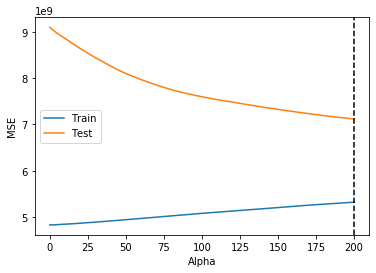

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Take a look at this graph of our training and test MSE against alpha. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what alpha represents and how it relates to overfitting vs underfitting.

## Summary

Well done! You now know how to build Lasso and Ridge regression models, use them for feature selection and find an optimal value for $\text{alpha}$. 